In [3]:
#Importing libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Looking into the dataset

In [13]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


Focusing on the 'Heart_Disease_Prediction.csv' dataset

In [9]:
df.info(),df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

(None,
    Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
 0   70    1                4  130          322             0            2   
 1   67    0                3  115          564             0            2   
 2   57    1                2  124          261             0            0   
 3   64    1                4  128          263             0            0   
 4   74    0                2  120          269             0            2   
 
    Max HR  Exercise angina  ST depression  Slope of ST  \
 0     109                0            2.4            2   
 1     160                0            1.6            2   
 2     141                0            0.3            1   
 3     105                1            0.2            2   
 4     121                1            0.2            1   
 
    Number of vessels fluro  Thallium Heart Disease  
 0                        3         3      Presence  
 1                        0         7       Absence  
 2   

In [48]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


# Checking any errors in the entries


In [20]:
invalid_entries = df[df.select_dtypes(include=['number']) < 0].count()
print("Invalid Entries:  \n", invalid_entries)

duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Records:", duplicates)

Invalid Entries:  
 Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

Number of Duplicate Records: 0


In [28]:
for column in df.columns:
    unique_entries = df[column].unique()
    print(f"Unique entries in the column above\n\n '{column}': {unique_entries}")

Unique entries in the column above

 'Age': [70 67 57 64 74 65 56 59 60 63 53 44 61 71 46 40 48 43 47 54 51 58 66 37
 50 42 62 49 52 45 41 76 39 35 55 34 38 69 68 77 29]
Unique entries in the column above

 'Sex': [1 0]
Unique entries in the column above

 'Chest pain type': [4 3 2 1]
Unique entries in the column above

 'BP': [130 115 124 128 120 110 140 150 135 142 134 112 132 138 160 170 144 122
 152 101 126 118 136 105 174 145 108 156 106 104  94 146 148 178 125 100
 165 180 158 200 117 192 123 129 102 155 172]
Unique entries in the column above

 'Cholesterol': [322 564 261 263 269 177 256 239 293 407 234 226 235 303 149 311 203 211
 199 229 245 204 288 275 243 295 230 265 228 215 326 200 207 273 180 222
 223 209 233 197 218 246 225 315 205 417 195 198 166 178 249 281 126 305
 240 276 319 242 260 354 309 208 236 270 214 201 244 306 221 330 266 206
 212 302 313 141 237 289 254 274 258 160 327 304 271 283 188 286 360 267
 196 232 277 210 213 282 167 224 268 250 219 217 308 193 231 2

# Knowing that the dataset doesn't contain known values and we understand that entries, our next goal is to visualize it

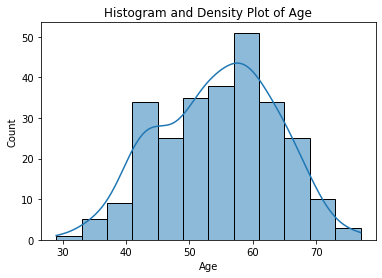

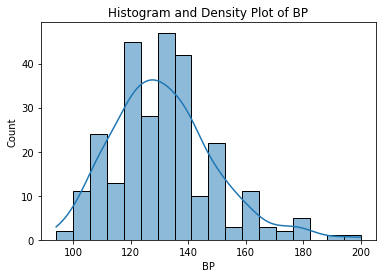

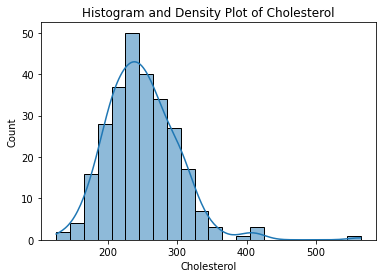

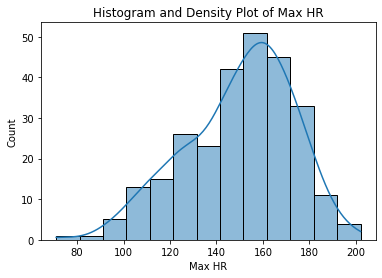

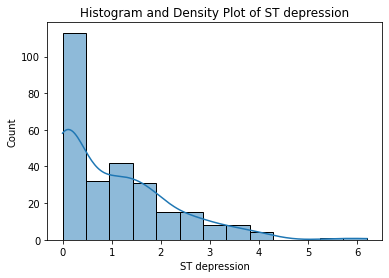

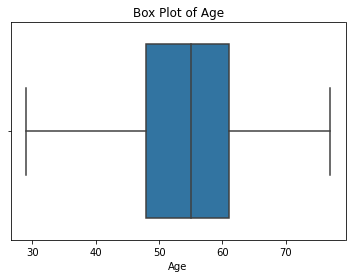

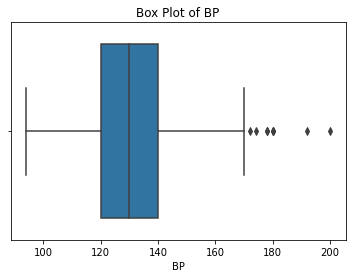

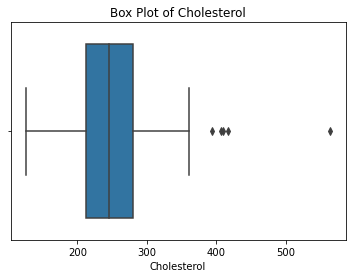

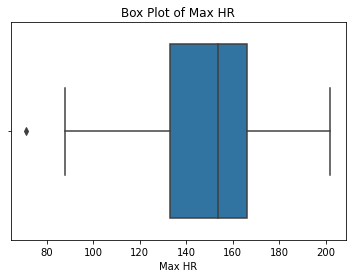

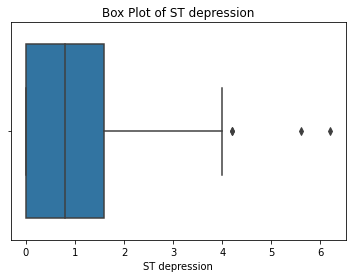

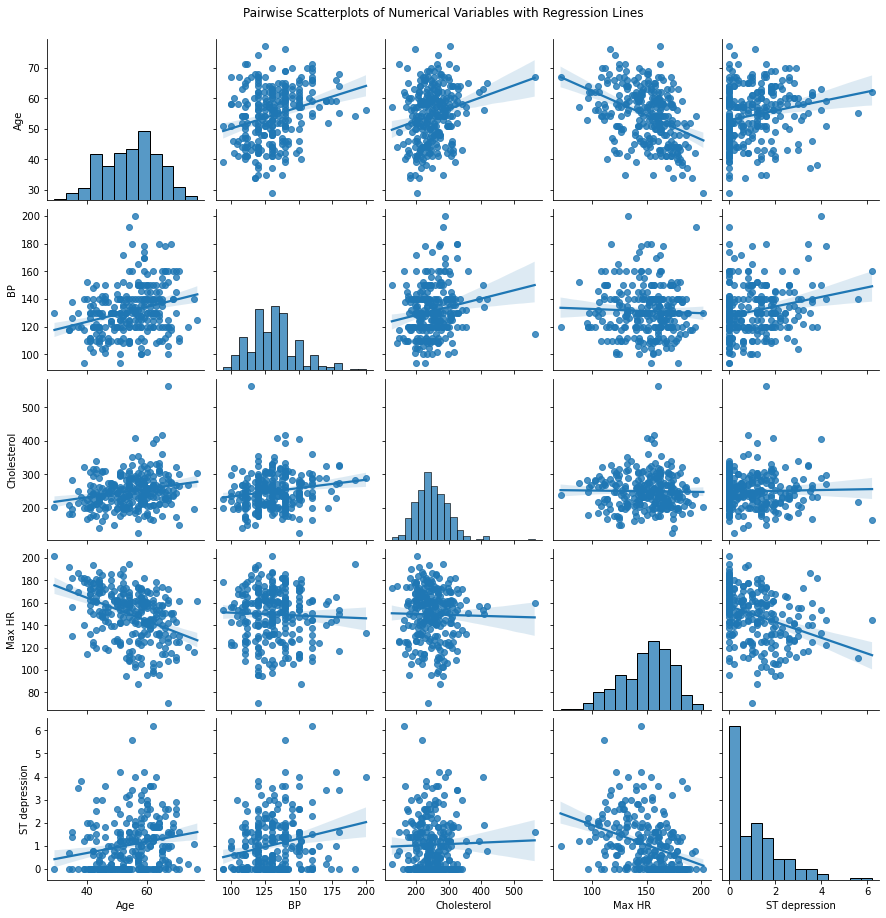

In [43]:
#Visualizing numerical columsn containing large range of entrie values.
unique_counts = df.nunique()
selected_columns = unique_counts[unique_counts > 4].index

df_selected = df[selected_columns]

for col in df_selected.select_dtypes(include=['number']).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram and Density Plot of {col}')
    plt.show()

# Box plots for numerical variables
for col in df_selected.select_dtypes(include=['number']).columns:
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

# Scatterplots for relationships between numerical variables
sns.pairplot(df_selected.select_dtypes(include=['number']), kind='reg')
plt.suptitle('Pairwise Scatterplots of Numerical Variables with Regression Lines', y=1.02)
plt.show()

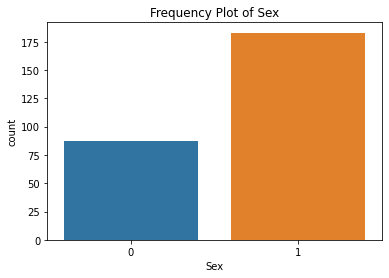

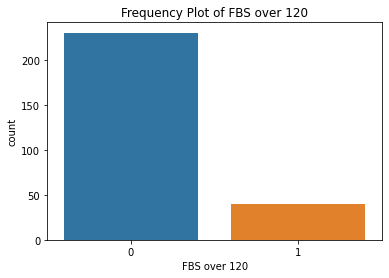

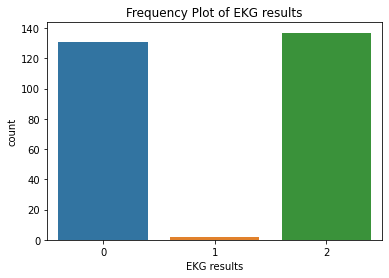

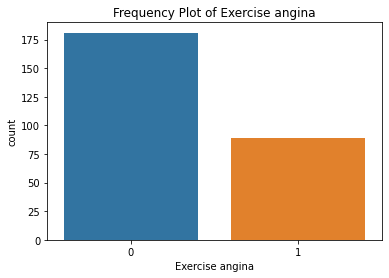

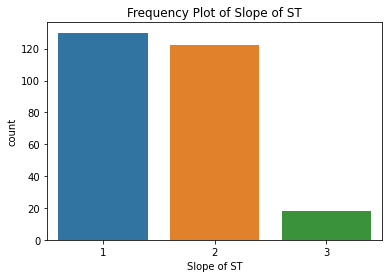

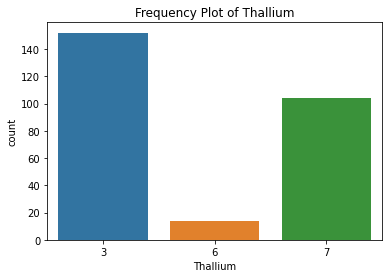

In [47]:
unique_counts_2 = df.nunique()
selected_columns_2 = unique_counts[unique_counts < 4].index

df_selected_2 = df[selected_columns_2]

for col in df_selected_2.select_dtypes(include=['number']).columns:
    sns.countplot(x=df[col])
    plt.title(f'Frequency Plot of {col}')
    plt.show()

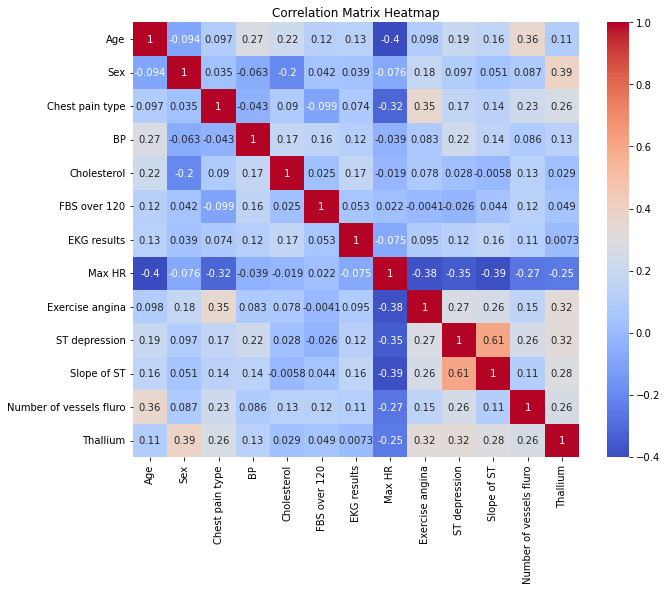

In [49]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# From our first set of visualizations of numerical columns containing > 4 unique entries, we are able to see potential outliers in those columns, we will focus on checking if they are outliers 

We will ignore age as there are no visible outliers and prioritize columns (BP, Chloestrol, Max HR, and ST Depression) 

In [63]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

BP_outlier = detect_outliers(df['BP']).sum()
Chloestrol_outlier = detect_outliers(df['Cholesterol']).sum()
MaxHR_outlier = detect_outliers(df['Max HR']).sum()
STdepression_outlier = detect_outliers(df['ST depression']).sum()

print('Number outliers in BP:',BP_outlier,'\nNumber outliers in Chloestrol:',Chloestrol_outlier,'\nNumber outliers in Max HR:',MaxHR_outlier,'\nNumber of outliers in ST Depression',STdepression_outlier)

Number outliers in BP: 9 
Number outliers in Chloestrol: 5 
Number outliers in Max HR: 1 
Number of outliers in ST Depression 4


To handle the outliers, 